# Visualizing Sentiment Analysis Results
### Objective:
<p>Visualize overall sentiment per bank, rating distribution, sentiment vs ratings, and trends over time.</p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/analyzed/analyzed_reviews.csv')

# Display first few rows
df.head()

,review,rating,date,bank,source_app,sentiment_label,sentiment_score
0,The CBE app has been highly unreliable in rece...,2,NaN,CBE,CBE,NEGATIVE,0.999739
1,"this new update(Mar 19,2025) is great in fixin...",4,NaN,CBE,CBE,NEGATIVE,0.996838
2,Good job to the CBE team on this mobile app! I...,5,NaN,CBE,CBE,POSITIVE,0.999819
3,this app has developed in a very good ways but...,5,NaN,CBE,CBE,NEGATIVE,0.998314
4,as if the update of march 19 i can't take a sc...,2,NaN,CBE,CBE,NEGATIVE,0.999533


Visualization 1: Sentiment Distribution by Bank

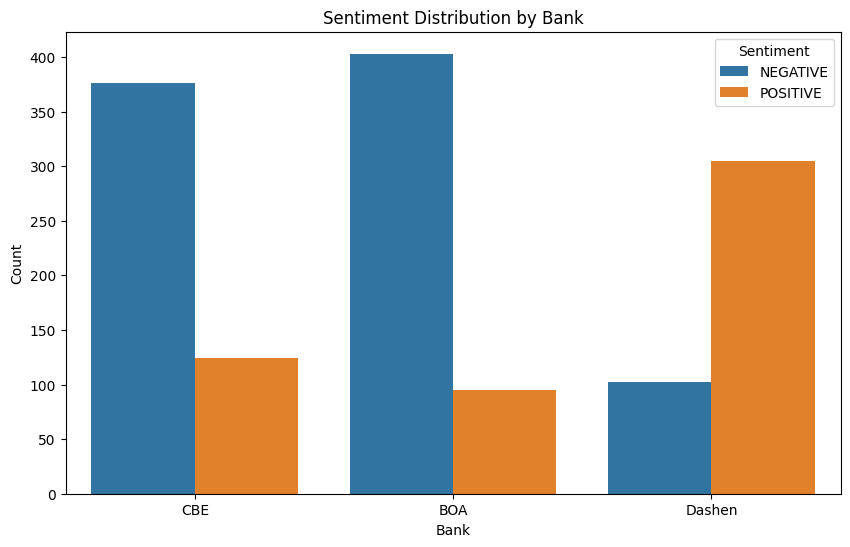

In [3]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bank', hue='sentiment_label')
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Visualization 2: Average Sentiment Score by Rating

C:\Users\የአብትዕግስት\AppData\Local\Temp\ipykernel_46304\1599731319.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='rating', y='sentiment_score', ci=None)


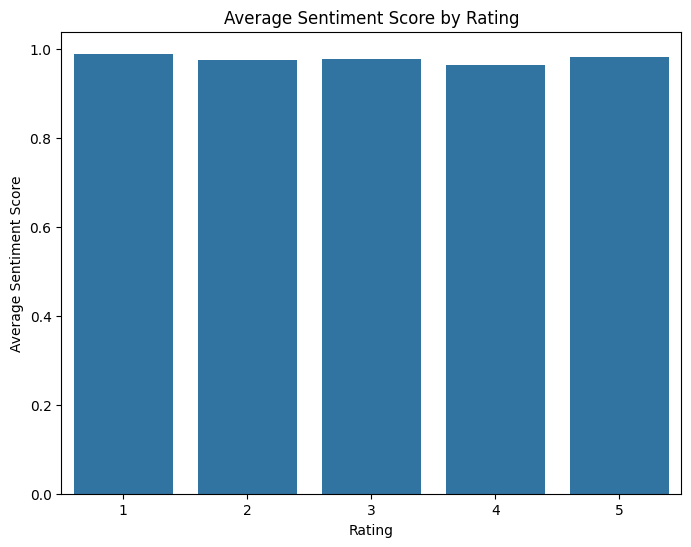

In [4]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='rating', y='sentiment_score', ci=None)
plt.title('Average Sentiment Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.show()

Visualization 3: Monthly Review Volume

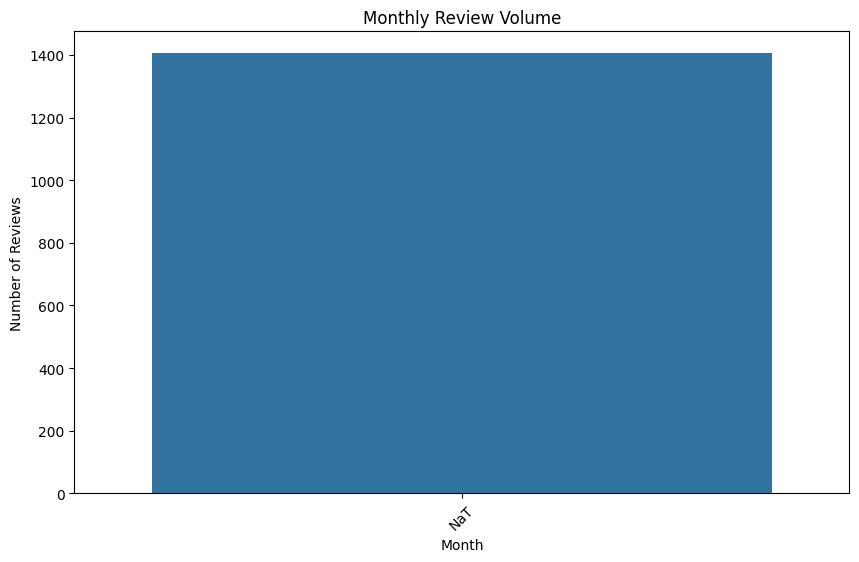

In [5]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.to_period('M').astype(str)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='month', order=df['month'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Monthly Review Volume')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

Visualization 4: Sentiment by Bank and Rating

c:\Users\የአብትዕግስት\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\የአብትዕግስት\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\የአብትዕግስት\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


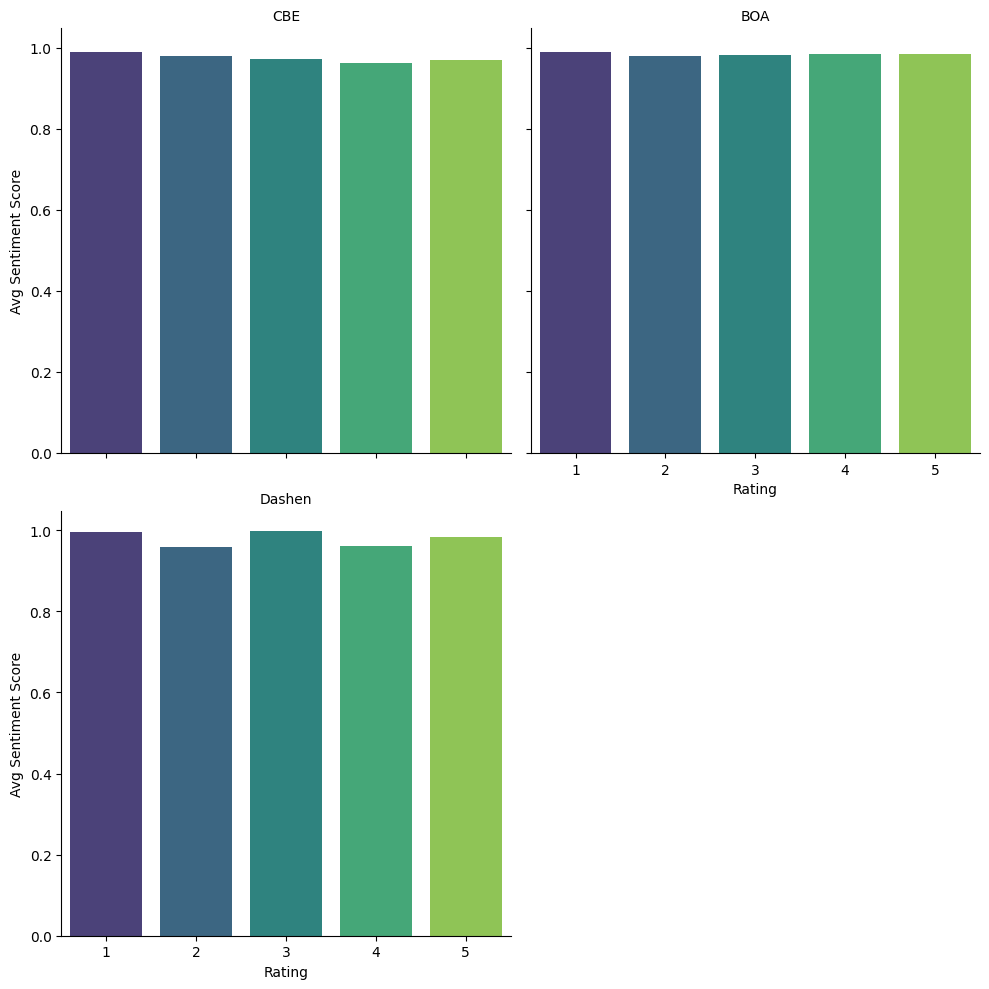

In [6]:
g = sns.FacetGrid(df, col='bank', col_wrap=2, height=5)
g.map_dataframe(sns.barplot, 'rating', 'sentiment_score', errorbar=None, palette='viridis')
g.set_titles("{col_name}")
g.set_axis_labels("Rating", "Avg Sentiment Score")
plt.tight_layout()
plt.show()